# Problem Statement
Does the rank of an author's books have anything to do with the number of pages, polarity of decriptions and titles, and ratings-count?

In [1]:
import pandas as pd
import requests
import json
import time
my_api_key = 'iwwvEiB9TGDQ1RgH18rBSTtgNxUNoTjQ'

In [2]:
request = "https://api.nytimes.com/svc/books/v3/lists/names.json?api-key={}".format(my_api_key)
response =  requests.get(request)
nyt_lists = response.json()
nyt_lists

{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company.  All Rights Reserved.',
 'num_results': 59,
 'results': [{'list_name': 'Combined Print and E-Book Fiction',
   'display_name': 'Combined Print & E-Book Fiction',
   'list_name_encoded': 'combined-print-and-e-book-fiction',
   'oldest_published_date': '2011-02-13',
   'newest_published_date': '2021-12-12',
   'updated': 'WEEKLY'},
  {'list_name': 'Combined Print and E-Book Nonfiction',
   'display_name': 'Combined Print & E-Book Nonfiction',
   'list_name_encoded': 'combined-print-and-e-book-nonfiction',
   'oldest_published_date': '2011-02-13',
   'newest_published_date': '2021-12-12',
   'updated': 'WEEKLY'},
  {'list_name': 'Hardcover Fiction',
   'display_name': 'Hardcover Fiction',
   'list_name_encoded': 'hardcover-fiction',
   'oldest_published_date': '2008-06-08',
   'newest_published_date': '2021-12-12',
   'updated': 'WEEKLY'},
  {'list_name': 'Hardcover Nonfiction',
   'display_name': 'Hardcover No

In [136]:
#need loop of dates for every week of past 20 years in the format yyyy-mm-dd
date = "2011-02-13"
request = "https://api.nytimes.com/svc/books/v3/lists/{0}/combined-print-and-e-book-nonfiction.json?api-key={1}".format(date, my_api_key)
response =  requests.get(request)
nyt_lists = response.json()
len(nyt_lists)
nyt_lists

{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company.  All Rights Reserved.',
 'num_results': 35,
 'last_modified': '2019-08-29T20:54:03-04:00',
 'results': {'list_name': 'Combined Print and E-Book Nonfiction',
  'list_name_encoded': 'combined-print-and-e-book-nonfiction',
  'bestsellers_date': '2011-01-30',
  'published_date': '2011-02-13',
  'published_date_description': 'first',
  'next_published_date': '2011-02-20',
  'previous_published_date': '',
  'display_name': 'Combined Print & E-Book Nonfiction',
  'normal_list_ends_at': 15,
  'updated': 'WEEKLY',
  'books': [{'rank': 1,
    'rank_last_week': 0,
    'weeks_on_list': 1,
    'asterisk': 0,
    'dagger': 0,
    'primary_isbn10': '0679603751',
    'primary_isbn13': '9780679603757',
    'publisher': 'Random House',
    'description': 'An Olympic runner’s story of survival as a prisoner of the Japanese in World War II.',
    'price': '0.00',
    'title': 'UNBROKEN',
    'author': 'Laura Hillenbrand',
    '

# Data Cleaning

In [137]:
def regex_convert(date_string):
    date_match = re.search(r'(\d{4})-(\d{2})-(\d{2})', date_string)
    if date_match:
        return date_match.group(2) + '/' + date_match.group(3) + '/' + date_match.group(1)
    return None

In [138]:
import datetime
from datetime import datetime
# my_date = datetime.date.today() 
# my_date_str = str(my_date.year) + '-' + str(my_date.month) + '-' + str(my_date.day)
# my_date_str
# my_date.isocalendar()
# for week in my_date.isocalendar:
    
# year, week_num, day_of_week = my_date.isocalendar()
# print("Week #" + str(week_num) + " of year " + str(year))
import datetime as dt
from datetime import date, timedelta

def allsundays(year):
    d = date(year,1,1)                    # January 1st
    d += timedelta(days = 6 - d.weekday())  # First Sunday
    while d.year == year:
        yield d
        d += timedelta(days = 7)

years = []
for i in range(2011, 2022):
     years.append(i)
years
# # for d in allsundays(2000):
# #     print(d)
sunday_dates = []
for year in years:
     sunday_dates.append([d for d in allsundays(year)])

dates = []
for year in sunday_dates:
    for d in year: 
        dates.append(d.strftime("%Y-%m-%d"))
dates

['2011-01-02',
 '2011-01-09',
 '2011-01-16',
 '2011-01-23',
 '2011-01-30',
 '2011-02-06',
 '2011-02-13',
 '2011-02-20',
 '2011-02-27',
 '2011-03-06',
 '2011-03-13',
 '2011-03-20',
 '2011-03-27',
 '2011-04-03',
 '2011-04-10',
 '2011-04-17',
 '2011-04-24',
 '2011-05-01',
 '2011-05-08',
 '2011-05-15',
 '2011-05-22',
 '2011-05-29',
 '2011-06-05',
 '2011-06-12',
 '2011-06-19',
 '2011-06-26',
 '2011-07-03',
 '2011-07-10',
 '2011-07-17',
 '2011-07-24',
 '2011-07-31',
 '2011-08-07',
 '2011-08-14',
 '2011-08-21',
 '2011-08-28',
 '2011-09-04',
 '2011-09-11',
 '2011-09-18',
 '2011-09-25',
 '2011-10-02',
 '2011-10-09',
 '2011-10-16',
 '2011-10-23',
 '2011-10-30',
 '2011-11-06',
 '2011-11-13',
 '2011-11-20',
 '2011-11-27',
 '2011-12-04',
 '2011-12-11',
 '2011-12-18',
 '2011-12-25',
 '2012-01-01',
 '2012-01-08',
 '2012-01-15',
 '2012-01-22',
 '2012-01-29',
 '2012-02-05',
 '2012-02-12',
 '2012-02-19',
 '2012-02-26',
 '2012-03-04',
 '2012-03-11',
 '2012-03-18',
 '2012-03-25',
 '2012-04-01',
 '2012-04-

# Below Cell is Test Cell (does not need to be run)

In [77]:
#this just gets 3 weeks 
nyt_dict = {}
index = 0
for date in dates[7:10]:
    request = "https://api.nytimes.com/svc/books/v3/lists/{0}/hardcover-fiction.json?api-key={1}".format(date, my_api_key)
    response =  requests.get(request)
    nyt_dict[index] = response.json()["results"]
    index +=1

# This Cell Below is to Extract New York Times Data

#### This is ran only the first time when you don't have the CSV file

In [139]:
#this to get all weeks 
nyt_dict = {}
index = 0
i = 7
j = 10
while j < 400: 
    request = "https://api.nytimes.com/svc/books/v3/lists/{0}/combined-print-and-e-book-fiction.json?api-key={1}".format(date, my_api_key)
    response =  requests.get(request)
    for date in dates[i:j]:
        
        if response.status_code == 200:
            try: 
                nyt_dict[index] = response.json()["results"]
                index +=1
                i += 3
                j += 3
            except:
                 print("Something wrong with response, {}\n Original error".format(
                json.loads(response.text)["fault"]['faultstring'],e))
        else:
            time.sleep(5)

### Dictionary of the NYT data

In [140]:
nyt_dict

{0: {'list_name': 'Combined Print and E-Book Fiction',
  'list_name_encoded': 'combined-print-and-e-book-fiction',
  'bestsellers_date': '2021-11-27',
  'published_date': '2021-12-12',
  'published_date_description': 'latest',
  'next_published_date': '',
  'previous_published_date': '2021-12-05',
  'display_name': 'Combined Print & E-Book Fiction',
  'normal_list_ends_at': 15,
  'updated': 'WEEKLY',
  'books': [{'rank': 1,
    'rank_last_week': 0,
    'weeks_on_list': 1,
    'asterisk': 0,
    'dagger': 0,
    'primary_isbn10': '1101885688',
    'primary_isbn13': '9781101885680',
    'publisher': 'Delacorte',
    'description': 'The ninth book in the Outlander series. As the Revolutionary War moves closer to Fraser’s Ridge, Claire and Jamie reunite with their daughter and her family.',
    'price': '0.00',
    'title': 'GO TELL THE BEES THAT I AM GONE',
    'author': 'Diana Gabaldon',
    'contributor': 'by Diana Gabaldon',
    'contributor_note': '',
    'book_image': 'https://storag

In [141]:
import pickle
with open("example_dict.p","wb") as f:
    pickle.dump(nyt_dict,f)

In [142]:
with open("example_dict.p","rb") as f:
    d = pickle.load(f)

In [145]:
df_dict = {"date":[],"rank":[],"title":[], 'author':[], 'description':[]}

In [146]:
for k,v in d.items():
    books = v["books"]
    
    for book in books:
        rank = book["rank"]
        title = book["title"]
        author = book["author"]
        description = book["description"]
        df_dict["title"].append(title)
        df_dict["author"].append(author)
        df_dict["rank"].append(rank)
        df_dict["date"].append(v['published_date'])
        df_dict["description"].append(description)
        

### Here is the DataFrame of the NYT Data

In [147]:
df_dict = pd.DataFrame(df_dict)

### Here is the CSV of the NYT Data

In [148]:
df_dict.to_csv("nyt_reviews.csv",index = False)

In [3]:
df_dict = pd.read_csv("nyt_reviews.csv")
df_dict

date  rank                            title  \
0     2021-12-12     1  GO TELL THE BEES THAT I AM GONE   
1     2021-12-12     2                     THE BECOMING   
2     2021-12-12     3                     FEAR NO EVIL   
3     2021-12-12     4                 THE JUDGE'S LIST   
4     2021-12-12     5                         THE WISH   
...          ...   ...                              ...   
2500  2018-06-03    11              THE WIFE BETWEEN US   
2501  2018-06-03    12                   INTO THE WATER   
2502  2018-06-03    13             BEFORE WE WERE YOURS   
2503  2018-06-03    14              THE HANDMAID'S TALE   
2504  2018-06-03    15             THE COUPLE NEXT DOOR   

                                  author  \
0                         Diana Gabaldon   
1                           Nora Roberts   
2                        James Patterson   
3                           John Grisham   
4                        Nicholas Sparks   
...                                  ...   
2500  Greer Hendricks and Sarah Pekkanen   
2501                       Paula Hawkins   
2502                        Lisa Wingate   
2503                     Margaret Atwood   
2504                        Shari Lapena   

                                            description  
0     The ninth book in the Outlander series. As the...  
1     The second book in the Dragon Heart Legacy ser...  
2     The 29th book in the Alex Cross series. Cross ...  
3     The second book in the Whistler series. Invest...  
4     Maggie Dawes, a renowned travel photographer, ...  
...                                                 ...  
2500  The story of a love triangle is told from seve...  
2501  In this psychological thriller by the author o...  
2502  A South Carolina lawyer learns about the quest...  
2503  Men and women in a dystopian future. The basis...  
2504  A couple’s secrets emerge after their baby dis...  

[2505 rows x 5 columns]

# Data Cleaning

In [4]:
df_dict["title"] = df_dict["title"].str.lower()


# Data Cleaning

### Creating a Rank bucket to make a correlation between NYT and Kaggle data

In [5]:
def rank_bucket_nyt(rank):
    if (rank >= 0) and (rank < 4):
        return 5
    if (rank >= 4) and (rank < 8):
        return 4
    if (rank >= 8) and (rank < 12):
        return 3
    if (rank >= 12) and (rank < 16):
        return 2
    if (rank >= 16) and (rank <= 20):
        return 1
df_dict["rank_bucket"] = df_dict["rank"].apply(rank_bucket_nyt)
df_dict

date  rank                            title  \
0     2021-12-12     1  go tell the bees that i am gone   
1     2021-12-12     2                     the becoming   
2     2021-12-12     3                     fear no evil   
3     2021-12-12     4                 the judge's list   
4     2021-12-12     5                         the wish   
...          ...   ...                              ...   
2500  2018-06-03    11              the wife between us   
2501  2018-06-03    12                   into the water   
2502  2018-06-03    13             before we were yours   
2503  2018-06-03    14              the handmaid's tale   
2504  2018-06-03    15             the couple next door   

                                  author  \
0                         Diana Gabaldon   
1                           Nora Roberts   
2                        James Patterson   
3                           John Grisham   
4                        Nicholas Sparks   
...                                  ...   
2500  Greer Hendricks and Sarah Pekkanen   
2501                       Paula Hawkins   
2502                        Lisa Wingate   
2503                     Margaret Atwood   
2504                        Shari Lapena   

                                            description  rank_bucket  
0     The ninth book in the Outlander series. As the...            5  
1     The second book in the Dragon Heart Legacy ser...            5  
2     The 29th book in the Alex Cross series. Cross ...            5  
3     The second book in the Whistler series. Invest...            4  
4     Maggie Dawes, a renowned travel photographer, ...            4  
...                                                 ...          ...  
2500  The story of a love triangle is told from seve...            3  
2501  In this psychological thriller by the author o...            2  
2502  A South Carolina lawyer learns about the quest...            2  
2503  Men and women in a dystopian future. The basis...            2  
2504  A couple’s secrets emerge after their baby dis...            2  

[2505 rows x 6 columns]

# Kaggle Data

In [6]:
kaggle = pd.read_csv("books_project.csv", error_bad_lines=False)
kaggle

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11118   45631   Expelled from Eden: A William T. Vollmann Reader   
11119   45633                        You Bright and Risen Angels   
11120   45634                    The Ice-Shirt (Seven Dreams #1)   
11121   45639                                        Poor People   
11122   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   
1                             J.K. Rowling/Mary GrandPré            4.49   
2                                           J.K. Rowling            4.42   
3                             J.K. Rowling/Mary GrandPré            4.56   
4                             J.K. Rowling/Mary GrandPré            4.78   
...                                                  ...             ...   
11118  William T. Vollmann/Larry McCaffery/Michael He...            4.06   
11119                                William T. Vollmann            4.08   
11120                                William T. Vollmann            3.96   
11121                                William T. Vollmann            3.72   
11122                                         Mark Twain            3.91   

             isbn         isbn13 language_code    num_pages  ratings_count  \
0      0439785960  9780439785969           eng          652        2095690   
1      0439358078  9780439358071           eng          870        2153167   
2      0439554896  9780439554893           eng          352           6333   
3      043965548X  9780439655484           eng          435        2339585   
4      0439682584  9780439682589           eng         2690          41428   
...           ...            ...           ...          ...            ...   
11118  1560254416  9781560254416           eng          512            156   
11119  0140110879  9780140110876           eng          635            783   
11120  0140131965  9780140131963           eng          415            820   
11121  0060878827  9780060878825           eng          434            769   
11122  8497646983  9788497646987           spa          272            113   

       text_reviews_count publication_date        publisher  
0                   27591        9/16/2006  Scholastic Inc.  
1                   29221         9/1/2004  Scholastic Inc.  
2                     244        11/1/2003       Scholastic  
3                   36325         5/1/2004  Scholastic Inc.  
4                     164        9/13/2004       Scholastic  
...                   ...              ...              ...  
11118                  20       12/21/2004    Da Capo Press  
11119                  56        12/1/1988    Penguin Books  
11120                  95         8/1/1993    Penguin Books  
11121                 139        2/27/2007             Ecco  
11122                  12        5/28/2006    Edimat Libros  

[11123 rows x 12 columns]

# Data Cleaning 

In [7]:
def rank_bucket_kaggle(rank):
    if (rank >= 0) and (rank < 1):
        return 1
    if (rank >= 1) and (rank < 2):
        return 2
    if (rank >= 2) and (rank < 3):
        return 3
    if (rank >= 3) and (rank < 4):
        return 4
    if (rank >= 4) and (rank <= 5):
        return 5
kaggle["rank_bucket"] = kaggle["average_rating"].apply(rank_bucket_kaggle)
kaggle

bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11118   45631   Expelled from Eden: A William T. Vollmann Reader   
11119   45633                        You Bright and Risen Angels   
11120   45634                    The Ice-Shirt (Seven Dreams #1)   
11121   45639                                        Poor People   
11122   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   
1                             J.K. Rowling/Mary GrandPré            4.49   
2                                           J.K. Rowling            4.42   
3                             J.K. Rowling/Mary GrandPré            4.56   
4                             J.K. Rowling/Mary GrandPré            4.78   
...                                                  ...             ...   
11118  William T. Vollmann/Larry McCaffery/Michael He...            4.06   
11119                                William T. Vollmann            4.08   
11120                                William T. Vollmann            3.96   
11121                                William T. Vollmann            3.72   
11122                                         Mark Twain            3.91   

             isbn         isbn13 language_code    num_pages  ratings_count  \
0      0439785960  9780439785969           eng          652        2095690   
1      0439358078  9780439358071           eng          870        2153167   
2      0439554896  9780439554893           eng          352           6333   
3      043965548X  9780439655484           eng          435        2339585   
4      0439682584  9780439682589           eng         2690          41428   
...           ...            ...           ...          ...            ...   
11118  1560254416  9781560254416           eng          512            156   
11119  0140110879  9780140110876           eng          635            783   
11120  0140131965  9780140131963           eng          415            820   
11121  0060878827  9780060878825           eng          434            769   
11122  8497646983  9788497646987           spa          272            113   

       text_reviews_count publication_date        publisher  rank_bucket  
0                   27591        9/16/2006  Scholastic Inc.            5  
1                   29221         9/1/2004  Scholastic Inc.            5  
2                     244        11/1/2003       Scholastic            5  
3                   36325         5/1/2004  Scholastic Inc.            5  
4                     164        9/13/2004       Scholastic            5  
...                   ...              ...              ...          ...  
11118                  20       12/21/2004    Da Capo Press            5  
11119                  56        12/1/1988    Penguin Books            5  
11120                  95         8/1/1993    Penguin Books            4  
11121                 139        2/27/2007             Ecco            4  
11122                  12        5/28/2006    Edimat Libros            4  

[11123 rows x 13 columns]

# Data Cleaning

Needed to do this in order to compare titles with New York Times Data

In [8]:
kaggle["title"] = kaggle["title"].str.lower()

# Total Merged Data (Data Manipulation)

In [9]:
merged_data = df_dict.merge(kaggle, left_on = "author", right_on = "authors", how = "inner")
merged_data

date  rank                          title_x  \
0      2021-12-12     1  go tell the bees that i am gone   
1      2021-12-12     1  go tell the bees that i am gone   
2      2021-12-12     1  go tell the bees that i am gone   
3      2021-12-12     1  go tell the bees that i am gone   
4      2021-12-12     1  go tell the bees that i am gone   
...           ...   ...                              ...   
10573  2017-11-26     9  the house of unexpected sisters   
10574  2017-11-26     9  the house of unexpected sisters   
10575  2018-06-03     8               the high tide club   
10576  2018-06-03     8               the high tide club   
10577  2018-06-03     8               the high tide club   

                       author  \
0              Diana Gabaldon   
1              Diana Gabaldon   
2              Diana Gabaldon   
3              Diana Gabaldon   
4              Diana Gabaldon   
...                       ...   
10573  Alexander McCall Smith   
10574  Alexander McCall Smith   
10575        Mary Kay Andrews   
10576        Mary Kay Andrews   
10577        Mary Kay Andrews   

                                             description  rank_bucket_x  \
0      The ninth book in the Outlander series. As the...              5   
1      The ninth book in the Outlander series. As the...              5   
2      The ninth book in the Outlander series. As the...              5   
3      The ninth book in the Outlander series. As the...              5   
4      The ninth book in the Outlander series. As the...              5   
...                                                  ...            ...   
10573  During an investigation, Precious Ramotswe enc...              3   
10574  During an investigation, Precious Ramotswe enc...              3   
10575  An eccentric millionaire enlists the attorney ...              3   
10576  An eccentric millionaire enlists the attorney ...              3   
10577  An eccentric millionaire enlists the attorney ...              3   

       bookID                                            title_y  \
0        5364                 dragonfly in amber (outlander  #2)   
1       10964                          outlander (outlander  #1)   
2       10965         a breath of snow and ashes (outlander  #6)   
3       10969                 dragonfly in amber (outlander  #2)   
4       10987                            voyager (outlander  #3)   
...       ...                                                ...   
10573   15905  the finer points of sausage dogs (portuguese i...   
10574   28184  blue shoes and happiness (no. 1 ladies' detect...   
10575   38030     savannah blues (weezie and bebe mysteries  #1)   
10576   38030     savannah blues (weezie and bebe mysteries  #1)   
10577   38030     savannah blues (weezie and bebe mysteries  #1)   

                      authors  average_rating        isbn         isbn13  \
0              Diana Gabaldon            4.32  0385335970  9780385335973   
1              Diana Gabaldon            4.23  0440242940  9780440242949   
2              Diana Gabaldon            4.44  0385340397  9780385340397   
3              Diana Gabaldon            4.32  0385302312  9780385302319   
4              Diana Gabaldon            4.39  0385335997  9780385335997   
...                       ...             ...         ...            ...   
10573  Alexander McCall Smith            3.69  1400095085  9781400095087   
10574  Alexander McCall Smith            4.06  1400075718  9781400075713   
10575        Mary Kay Andrews            3.99  0060519134  9780060519131   
10576        Mary Kay Andrews            3.99  0060519134  9780060519131   
10577        Mary Kay Andrews            3.99  0060519134  9780060519131   

      language_code    num_pages  ratings_count  text_reviews_count  \
0               eng          743         222140               11121   
1               eng          850         673350               34690   
2               eng          980         105950    

In [10]:
merged_data.shape

(10578, 19)

# Merged Data Without Duplicates of Titles (Data Manipulation)

In [11]:
merged_data_titles = merged_data.drop_duplicates(subset = ["title_x"])
merged_data_titles

date  rank                          title_x  \
0      2021-12-12     1  go tell the bees that i am gone   
30     2014-08-17    16                        outlander   
70     2014-10-19     9               dragonfly in amber   
240    2021-12-12     2                     the becoming   
285    2011-05-08     9                     chasing fire   
...           ...   ...                              ...   
10464  2017-01-15    12                    the alchemist   
10470  2017-05-21     5              the handmaid's tale   
10524  2017-09-24     3                a legacy of spies   
10530  2017-11-26     9  the house of unexpected sisters   
10575  2018-06-03     8               the high tide club   

                       author  \
0              Diana Gabaldon   
30             Diana Gabaldon   
70             Diana Gabaldon   
240              Nora Roberts   
285              Nora Roberts   
...                       ...   
10464            Paulo Coelho   
10470         Margaret Atwood   
10524           John le Carré   
10530  Alexander McCall Smith   
10575        Mary Kay Andrews   

                                             description  rank_bucket_x  \
0      The ninth book in the Outlander series. As the...              5   
30     During a second honeymoon in the Scottish High...              1   
70     Volume 2 of the Outlander series, about an 18t...              3   
240    The second book in the Dragon Heart Legacy ser...              5   
285    A smoke jumper faces a new season of firefight...              3   
...                                                  ...            ...   
10464  In this fable, a Spanish shepherd boy ventures...              2   
10470  In a dystopian future, men and women perform t...              4   
10524  Peter Guillam, formerly of the British Secret ...              5   
10530  During an investigation, Precious Ramotswe enc...              3   
10575  An eccentric millionaire enlists the attorney ...              3   

       bookID                                            title_y  \
0        5364                 dragonfly in amber (outlander  #2)   
30       5364                 dragonfly in amber (outlander  #2)   
70       5364                 dragonfly in amber (outlander  #2)   
240     17781       heart of the sea (gallaghers of ardmore  #3)   
285     17781       heart of the sea (gallaghers of ardmore  #3)   
...       ...                                                ...   
10464    1426                               warrior of the light   
10470    5104                                the handmaid's tale   
10524   18990                           the honourable schoolboy   
10530    7034  in the company of cheerful ladies (no. 1 ladie...   
10575   38030     savannah blues (weezie and bebe mysteries  #1)   

                      authors  average_rating        isbn         isbn13  \
0              Diana Gabaldon            4.32  0385335970  9780385335973   
30             Diana Gabaldon            4.32  0385335970  9780385335973   
70             Diana Gabaldon            4.32  0385335970  9780385335973   
240              Nora Roberts            4.15  0515128554  9780515128550   
285              Nora Roberts            4.15  0515128554  9780515128550   
...                       ...             ...         ...            ...   
10464            Paulo Coelho            3.70  0060527986  9780060527983   
10470         Margaret Atwood            4.11  0435124099  9780435124090   
10524           John le Carré            3.95  0743457919  9780743457910   
10530  Alexander McCall Smith            4.08  140007570X  9781400075706   
10575        Mary Kay Andrews            3.99  0060519134  9780060519131   

      language_code    num_pages  ratings_count  text_reviews_count  \
0               eng          743         222140               11121   
30              eng          743         222140               11121   
70              eng          743         222140    

In [12]:
merged_data_titles["average_rank"] = (merged_data_titles["rank_bucket_x"] + merged_data_titles["rank_bucket_y"]) / 2

/Users/skstup/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Merged Data Without Duplicates of Authors (Data Manipulation)

In [13]:
merged_data_authors = merged_data.drop_duplicates(subset = ["author"])

In [14]:
merged_data_authors 

date  rank                          title_x  \
0      2021-12-12     1  go tell the bees that i am gone   
240    2021-12-12     2                     the becoming   
1005   2021-12-12     3                     fear no evil   
1626   2021-12-12     4                 the judge's list   
2826   2021-12-12     5                         the wish   
...           ...   ...                              ...   
10464  2017-01-15    12                    the alchemist   
10470  2017-05-21     5              the handmaid's tale   
10524  2017-09-24     3                a legacy of spies   
10530  2017-11-26     9  the house of unexpected sisters   
10575  2018-06-03     8               the high tide club   

                       author  \
0              Diana Gabaldon   
240              Nora Roberts   
1005          James Patterson   
1626             John Grisham   
2826          Nicholas Sparks   
...                       ...   
10464            Paulo Coelho   
10470         Margaret Atwood   
10524           John le Carré   
10530  Alexander McCall Smith   
10575        Mary Kay Andrews   

                                             description  rank_bucket_x  \
0      The ninth book in the Outlander series. As the...              5   
240    The second book in the Dragon Heart Legacy ser...              5   
1005   The 29th book in the Alex Cross series. Cross ...              5   
1626   The second book in the Whistler series. Invest...              4   
2826   Maggie Dawes, a renowned travel photographer, ...              4   
...                                                  ...            ...   
10464  In this fable, a Spanish shepherd boy ventures...              2   
10470  In a dystopian future, men and women perform t...              4   
10524  Peter Guillam, formerly of the British Secret ...              5   
10530  During an investigation, Precious Ramotswe enc...              3   
10575  An eccentric millionaire enlists the attorney ...              3   

       bookID                                            title_y  \
0        5364                 dragonfly in amber (outlander  #2)   
240     17781       heart of the sea (gallaghers of ardmore  #3)   
1005     5575                                     cradle and all   
1626     1110                                         the broker   
2826     3462                                         the rescue   
...       ...                                                ...   
10464    1426                               warrior of the light   
10470    5104                                the handmaid's tale   
10524   18990                           the honourable schoolboy   
10530    7034  in the company of cheerful ladies (no. 1 ladie...   
10575   38030     savannah blues (weezie and bebe mysteries  #1)   

                      authors  average_rating        isbn         isbn13  \
0              Diana Gabaldon            4.32  0385335970  9780385335973   
240              Nora Roberts            4.15  0515128554  9780515128550   
1005          James Patterson            3.86  0446609404  9780446609401   
1626             John Grisham            3.78  0385340540  9780385340540   
2826          Nicholas Sparks            4.11  0446696129  9780446696128   
...                       ...             ...         ...            ...   
10464            Paulo Coelho            3.70  0060527986  9780060527983   
10470         Margaret Atwood            4.11  0435124099  9780435124090   
10524           John le Carré            3.95  0743457919  9780743457910   
10530  Alexander McCall Smith            4.08  140007570X  9781400075706   
10575        Mary Kay Andrews            3.99  0060519134  9780060519131   

      language_code    num_pages  ratings_count  text_reviews_count  \
0               eng          743         222140               11121   
240             eng          369          24451                 537   
1005            eng          384          27869    

In [15]:
merged_data_authors["average_rank"] = (merged_data_authors["rank_bucket_x"] + merged_data_authors["rank_bucket_y"]) / 2

/Users/skstup/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
merged_data_authors

date  rank                          title_x  \
0      2021-12-12     1  go tell the bees that i am gone   
240    2021-12-12     2                     the becoming   
1005   2021-12-12     3                     fear no evil   
1626   2021-12-12     4                 the judge's list   
2826   2021-12-12     5                         the wish   
...           ...   ...                              ...   
10464  2017-01-15    12                    the alchemist   
10470  2017-05-21     5              the handmaid's tale   
10524  2017-09-24     3                a legacy of spies   
10530  2017-11-26     9  the house of unexpected sisters   
10575  2018-06-03     8               the high tide club   

                       author  \
0              Diana Gabaldon   
240              Nora Roberts   
1005          James Patterson   
1626             John Grisham   
2826          Nicholas Sparks   
...                       ...   
10464            Paulo Coelho   
10470         Margaret Atwood   
10524           John le Carré   
10530  Alexander McCall Smith   
10575        Mary Kay Andrews   

                                             description  rank_bucket_x  \
0      The ninth book in the Outlander series. As the...              5   
240    The second book in the Dragon Heart Legacy ser...              5   
1005   The 29th book in the Alex Cross series. Cross ...              5   
1626   The second book in the Whistler series. Invest...              4   
2826   Maggie Dawes, a renowned travel photographer, ...              4   
...                                                  ...            ...   
10464  In this fable, a Spanish shepherd boy ventures...              2   
10470  In a dystopian future, men and women perform t...              4   
10524  Peter Guillam, formerly of the British Secret ...              5   
10530  During an investigation, Precious Ramotswe enc...              3   
10575  An eccentric millionaire enlists the attorney ...              3   

       bookID                                            title_y  \
0        5364                 dragonfly in amber (outlander  #2)   
240     17781       heart of the sea (gallaghers of ardmore  #3)   
1005     5575                                     cradle and all   
1626     1110                                         the broker   
2826     3462                                         the rescue   
...       ...                                                ...   
10464    1426                               warrior of the light   
10470    5104                                the handmaid's tale   
10524   18990                           the honourable schoolboy   
10530    7034  in the company of cheerful ladies (no. 1 ladie...   
10575   38030     savannah blues (weezie and bebe mysteries  #1)   

                      authors  average_rating        isbn         isbn13  \
0              Diana Gabaldon            4.32  0385335970  9780385335973   
240              Nora Roberts            4.15  0515128554  9780515128550   
1005          James Patterson            3.86  0446609404  9780446609401   
1626             John Grisham            3.78  0385340540  9780385340540   
2826          Nicholas Sparks            4.11  0446696129  9780446696128   
...                       ...             ...         ...            ...   
10464            Paulo Coelho            3.70  0060527986  9780060527983   
10470         Margaret Atwood            4.11  0435124099  9780435124090   
10524           John le Carré            3.95  0743457919  9780743457910   
10530  Alexander McCall Smith            4.08  140007570X  9781400075706   
10575        Mary Kay Andrews            3.99  0060519134  9780060519131   

      language_code    num_pages  ratings_count  text_reviews_count  \
0               eng          743         222140               11121   
240             eng          369          24451                 537   
1005            eng          384          27869    

# Data Cleaning

### Renamed num_pages to remove the space before (Data Cleaning on Merged Data)

In [17]:
merged_data_titles = merged_data_titles.rename(columns={'  num_pages': "num_pages"})
merged_data_authors = merged_data_authors.rename(columns={'  num_pages': "num_pages"})

In [18]:
merged_data_titles.columns

Index(['date', 'rank', 'title_x', 'author', 'description', 'rank_bucket_x',
       'bookID', 'title_y', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'rank_bucket_y', 'average_rank'],
      dtype='object')

In [19]:
merged_data_authors.columns

Index(['date', 'rank', 'title_x', 'author', 'description', 'rank_bucket_x',
       'bookID', 'title_y', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'rank_bucket_y', 'average_rank'],
      dtype='object')

# Visualizations

## Visualization 1

In [27]:
import matplotlib.pyplot as plt

In [28]:
#high_average = merged_data_authors[merged_data_authors['average_rank'] == 5]

ranking_author = merged_data_authors[merged_data_authors['average_rank'] == 5].groupby("author").mean()


In [29]:
ranking_author

rank  rank_bucket_x  bookID  average_rating         isbn13  \
author                                                                        
Diana Gabaldon      1              5    5364            4.32  9780385335973   
Harper Lee          1              5    2654            4.27  9780060935467   
Haruki Murakami     3              5   17800            4.04  9780099448761   
Janet Evanovich     1              5    3507            4.15  9780312349486   
Jeffrey Archer      1              5    7201            4.10  9780312997113   
Jim Butcher         1              5   17683            4.43  9780451460912   
Julie Garwood       3              5    9538            4.00  9780345453860   
Lee Child           3              5   21749            4.18  9780739340677   
Lisa Gardner        1              5   32523            4.16  9780553804324   
Nora Roberts        2              5   17781            4.15  9780515128550   
Stephen King        3              5    5094            4.23  9780451210852   

                 num_pages  ratings_count  text_reviews_count  rank_bucket_y  \
author                                                                         
Diana Gabaldon         743         222140               11121              5   
Harper Lee             323          10524                 898              5   
Haruki Murakami        393          50169                2117              5   
Janet Evanovich        310          81381                1925              5   
Jeffrey Archer         800          16264                 621              5   
Jim Butcher            517          91592                2747              5   
Julie Garwood          336          11205                 431              5   
Lee Child               13             53                  15              5   
Lisa Gardner           375          26891                1501              5   
Nora Roberts           369          24451                 537              5   
Stephen King           463         173022                5139              5   

                 average_rank  
author                         
Diana Gabaldon            5.0  
Harper Lee                5.0  
Haruki Murakami           5.0  
Janet Evanovich           5.0  
Jeffrey Archer            5.0  
Jim Butcher               5.0  
Julie Garwood             5.0  
Lee Child                 5.0  
Lisa Gardner              5.0  
Nora Roberts              5.0  
Stephen King              5.0

Text(0.5, 1.0, 'Bar Graph of Authors with an Average Rank of 5')

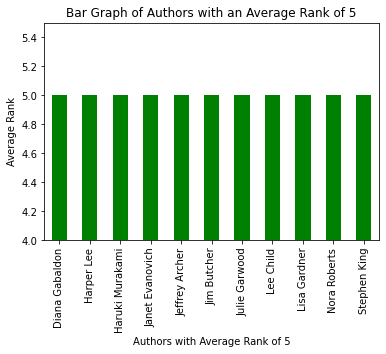

In [30]:
y = [4,5.5]
ranking_author["average_rank"].plot.bar(color="green")
plt.ylim(y)
plt.xlabel("Authors with Average Rank of 5")
plt.ylabel("Average Rank")
plt.title("Bar Graph of Authors with an Average Rank of 5")

#### Our visualization 1 shows the authors that all have an average_rank of 5. This means that they were highly ranked by both New York Times and Kaggle. 

## Visualization 1.2

In [31]:
ranking_author.groupby("author")["num_pages"].mean()

author
Diana Gabaldon     743
Harper Lee         323
Haruki Murakami    393
Janet Evanovich    310
Jeffrey Archer     800
Jim Butcher        517
Julie Garwood      336
Lee Child           13
Lisa Gardner       375
Nora Roberts       369
Stephen King       463
Name: num_pages, dtype: int64

Text(0.5, 1.0, 'Bar Graph of Authors with an Average Rank of 5 Compared to their Ratings Count')

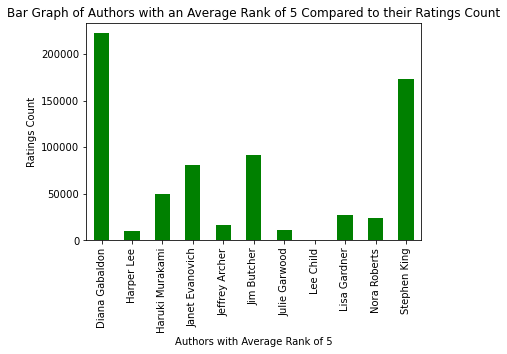

In [53]:
ranking_author["ratings_count"].plot.bar(color="green")
plt.xlabel("Authors with Average Rank of 5")
plt.ylabel("Ratings Count")
plt.title("Bar Graph of Authors with an Average Rank of 5 Compared to their Ratings Count")

Text(0.5, 1.0, 'Bar Graph of Authors with an Average Rank of 5 Compared to the Number of Pages')

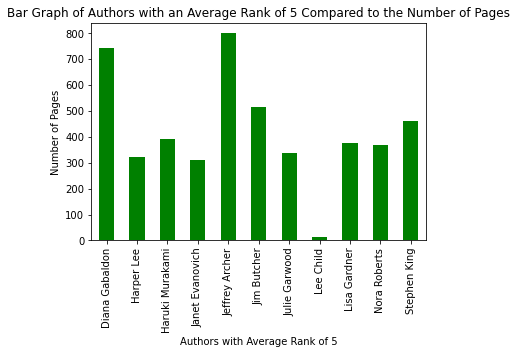

In [33]:
ranking_author["num_pages"].plot.bar(color="green")
plt.xlabel("Authors with Average Rank of 5")
plt.ylabel("Number of Pages")
plt.title("Bar Graph of Authors with an Average Rank of 5 Compared to the Number of Pages")

#### From this bar graph we were able to determine that the authors with an average_rank of 5 typically wrote books in the 300-400 number page length. The three outliars were Lee Child, Jeffrey Archer, and Diana Gabaldon. 

## Visualization 2

In [34]:
ranking_num = merged_data_authors.groupby('average_rank')['num_pages'].mean()

In [35]:
ranking_num

average_rank
2.5    363.857143
3.0    430.888889
3.5    444.750000
4.0    398.176471
4.5    379.357143
5.0    422.000000
Name: num_pages, dtype: float64

Text(0.5, 1.0, 'Correlation of Average Rank to Number of Pages')

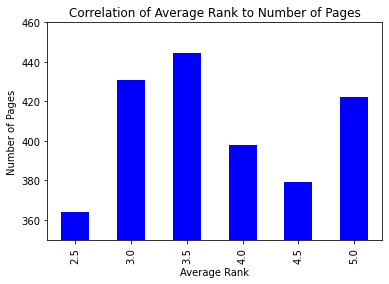

In [36]:
#y = [380, 385, 390, 395, 400, 405, 410, 415]

ranking_num.plot.bar(color="blue")
y = [350, 460]
plt.ylim(y)
plt.xlabel("Average Rank")
plt.ylabel("Number of Pages")
plt.title("Correlation of Average Rank to Number of Pages")

## Visualization 3

Text(0, 0.5, 'Number of Pages')

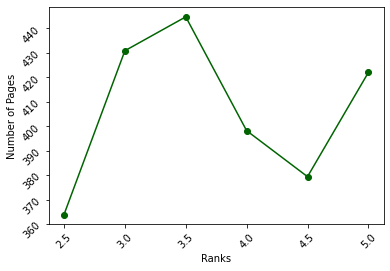

In [48]:
y = [385, 387, 389, 391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411]
x = ["Rank 1", "Rank 2", "Rank 3", "Rank 4", "Rank 5"]


plt.plot(ranking_num.index, ranking_num, c="darkgreen", marker = "o")
#plt.errorbar(x = means_grouped.index, y = means_grouped, yerr = error, ecolor = "#91CBBC", fmt = "none")
plt.yticks(rotation = 45)
plt.xticks(rotation =45)



plt.xlabel("Ranks")
plt.ylabel("Number of Pages")

#### The above graph shows that the highest ranked books (Rank 3.5)  had the highest number of pages. This demonstartes that page numbers did not have a huge affect on the ranking as Rank 2 and Rank 3 had very high page numbers. 

## Visualization 4

use rank bucket x and rank bucket y to see where each author was ranked differently 

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

In [39]:
import numpy as np

In [40]:
def polarity_all(review):
    sentiment = sentiment_analyzer.polarity_scores(review)
    return sentiment
def polarity_compound(review):
    sentiment = sentiment_analyzer.polarity_scores(review)["compound"]
    return sentiment
def polarity_positive(review):
    sentiment = sentiment_analyzer.polarity_scores(review)['pos']
    return sentiment
def polarity_neutral(review):
    sentiment = sentiment_analyzer.polarity_scores(review)['neu']
    return sentiment
def polarity_negative(review):
    sentiment = sentiment_analyzer.polarity_scores(review)['neg']
    return sentiment

In [41]:
merged_data_titles['polarity'] = merged_data_titles['description'].apply(polarity_all)
merged_data_titles['polarity_compound'] = merged_data_titles['description'].apply(polarity_compound)
merged_data_titles['polarity_positive'] = merged_data_titles['description'].apply(polarity_positive)
merged_data_titles['polarity_neutral'] = merged_data_titles['description'].apply(polarity_neutral)
merged_data_titles['polarity_negative'] = merged_data_titles['description'].apply(polarity_negative)

In [42]:
merged_data_titles

date  rank                          title_x  \
0      2021-12-12     1  go tell the bees that i am gone   
30     2014-08-17    16                        outlander   
70     2014-10-19     9               dragonfly in amber   
240    2021-12-12     2                     the becoming   
285    2011-05-08     9                     chasing fire   
...           ...   ...                              ...   
10464  2017-01-15    12                    the alchemist   
10470  2017-05-21     5              the handmaid's tale   
10524  2017-09-24     3                a legacy of spies   
10530  2017-11-26     9  the house of unexpected sisters   
10575  2018-06-03     8               the high tide club   

                       author  \
0              Diana Gabaldon   
30             Diana Gabaldon   
70             Diana Gabaldon   
240              Nora Roberts   
285              Nora Roberts   
...                       ...   
10464            Paulo Coelho   
10470         Margaret Atwood   
10524           John le Carré   
10530  Alexander McCall Smith   
10575        Mary Kay Andrews   

                                             description  rank_bucket_x  \
0      The ninth book in the Outlander series. As the...              5   
30     During a second honeymoon in the Scottish High...              1   
70     Volume 2 of the Outlander series, about an 18t...              3   
240    The second book in the Dragon Heart Legacy ser...              5   
285    A smoke jumper faces a new season of firefight...              3   
...                                                  ...            ...   
10464  In this fable, a Spanish shepherd boy ventures...              2   
10470  In a dystopian future, men and women perform t...              4   
10524  Peter Guillam, formerly of the British Secret ...              5   
10530  During an investigation, Precious Ramotswe enc...              3   
10575  An eccentric millionaire enlists the attorney ...              3   

       bookID                                            title_y  \
0        5364                 dragonfly in amber (outlander  #2)   
30       5364                 dragonfly in amber (outlander  #2)   
70       5364                 dragonfly in amber (outlander  #2)   
240     17781       heart of the sea (gallaghers of ardmore  #3)   
285     17781       heart of the sea (gallaghers of ardmore  #3)   
...       ...                                                ...   
10464    1426                               warrior of the light   
10470    5104                                the handmaid's tale   
10524   18990                           the honourable schoolboy   
10530    7034  in the company of cheerful ladies (no. 1 ladie...   
10575   38030     savannah blues (weezie and bebe mysteries  #1)   

                      authors  average_rating  ... text_reviews_count  \
0              Diana Gabaldon            4.32  ...              11121   
30             Diana Gabaldon            4.32  ...              11121   
70             Diana Gabaldon            4.32  ...              11121   
240              Nora Roberts            4.15  ...                537   
285              Nora Roberts            4.15  ...                537   
...                       ...             ...  ...                ...   
10464            Paulo Coelho            3.70  ...                945   
10470         Margaret Atwood            4.11  ...                 59   
10524           John le Carré            3.95  ...                513   
10530  Alexander McCall Smith            4.08  ...                 73   
10575        Mary Kay Andrews            3.99  ...               1049   

       publication_date              publisher  rank_bucket_y  average_rank  \
0              8/7/2001                 Bantam              5           5.0   
30             8/7/2001                 Bantam              5           3.0   
70             8/7/2001                 Bantam              5  

Text(0.5, 1.0, 'Polarity Scores of Description Compared to Rank')

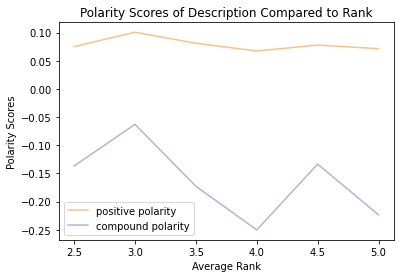

In [49]:
color_map = {"polarity_positive":"#fdc086","polarity_compound":"#beaed4"}
label_map = {"polarity_positive":"positive polarity","polarity_compound":"compound polarity"}
fig, ax =plt.subplots()
#grouped = merged_data_titles.groupby("rank_bucket_x")[["polarity_positive", "polarity_negative"]].mean()
grouped_pos = merged_data_titles.groupby("average_rank")["polarity_positive"].mean()
grouped_pos.plot(c=color_map["polarity_positive"], label=label_map["polarity_positive"])


grouped_neg = merged_data_titles.groupby("average_rank")["polarity_compound"].mean()
grouped_neg.plot(c=color_map["polarity_compound"], label=label_map["polarity_compound"])
#plt.plot(female_means,c=color_map["female"], label='_nolegend_')
plt.legend(labels = [label_map[x] for x in label_map])
plt.xlabel("Average Rank")
plt.ylabel("Polarity Scores")
plt.title("Polarity Scores of Description Compared to Rank")

#### The polarity of the descriptions displayed the highest positive rate at average_rank 3. The polarity of the descriptions displayed the highest compound rate at average_rank 3. This shows that the descriptions with the highest polarity were ranked at 3. 

## Visualization 5

In [44]:
merged_data_titles['title_x_polarity'] = merged_data_titles['title_x'].apply(polarity_all)
merged_data_titles['title_x_polarity_compound'] = merged_data_titles['title_x'].apply(polarity_compound)
merged_data_titles['title_x_polarity_positive'] = merged_data_titles['title_x'].apply(polarity_positive)
merged_data_titles['title_x_polarity_neutral'] = merged_data_titles['title_x'].apply(polarity_neutral)
merged_data_titles['title_x_polarity_negative'] = merged_data_titles['title_x'].apply(polarity_negative)

Text(0.5, 1.0, 'Polarity Scores of Titles Compared to Rank')

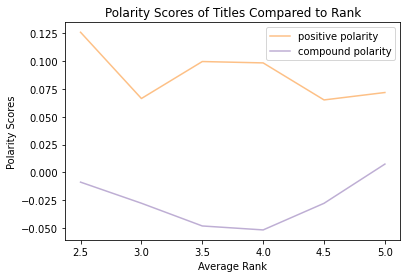

In [51]:
color_map = {"title_x_polarity_positive":"#fdc086","title_x_polarity_compound":"#beaed4"}
label_map = {"pos":"positive polarity", "compound":"compound polarity"}
fig, ax =plt.subplots()
grouped_pos = merged_data_titles.groupby("average_rank")["title_x_polarity_positive"].mean()
grouped_pos.plot(c=color_map["title_x_polarity_positive"], label=label_map["pos"])
grouped_compound = merged_data_titles.groupby("average_rank")["title_x_polarity_compound"].mean()

grouped_compound.plot(c=color_map["title_x_polarity_compound"], label=label_map["compound"])
plt.legend(labels = [label_map[x] for x in label_map])
plt.xlabel("Average Rank")
plt.ylabel("Polarity Scores")
plt.title("Polarity Scores of Titles Compared to Rank")

#### The polarity of the titles displayed the highest positive rate at average_rank 2.5. The polarity of the titles displayed the highest compound rate at average_rank 5. This shows that the titles with did not have a correlation to where the book was ranked since the compound polarity and positive polarity had very different results. 

## Visualization 6

In [46]:
ranking_rating = merged_data_authors.groupby('average_rank')['ratings_count'].mean()

Text(0.5, 1.0, 'Correlation of Average Rank to Ratings Count')

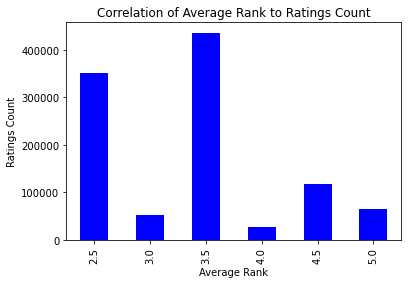

In [47]:
ranking_rating.plot.bar(color="blue")


plt.xlabel("Average Rank")
plt.ylabel("Ratings Count")
plt.title("Correlation of Average Rank to Ratings Count")

# Final Conclusion 

We were still able to come up with multiple conclusions about the merged data with the  average_rating of each book by comparing the rating between Book API from New York Times and Kaggle Goodreads Author/Books data set. First, we were able to create a rank bucket to look at how each book and author was ranked. By scaling the Kaggle ranks and the New York Times ranks on the same, we were then able to create an average_rank column. We analyzed data from  the authors that had a ranking of 5 in order to see if there were aspects of their books that were similar. Secondly, we were able to get the polarities of both the titles and descriptions. Although there was not one direct correlation we determined interesting insights. Our takeaways were that the most amount of books were ranked at a 3.5. Most books were 300-400 pages long. The highest polarity scores on the descriptions were ranked at a 3. There was no correlation with the highest polarity of the titles and where they were ranked. The authors that had a rank of 5 typically wrote books between 300-400 pages long.    

# Computationally Expensive

The step that took the longest to run and took up the most memory was gathering the New York Times Data because we had to do 400 iterations of 3 weeks to extract enough data to come up with correlations. We tried to speed this up by at first getting three weeks at a time individually; however, when we did it this way we exceeded the rate limit. Additionally, when we went to do over 400 iterations like do 600 iterations to get more data we also exceeded the rate limit.